[('세대', 89), ('소비', 17), ('등', 16), ('이', 14), ('유튜브', 14), ('것', 13), ('명', 12), ('있다', 11), ('수', 11), ('를', 10), ('선호', 10), ('더', 9), ('자신', 9), ('영향', 9), ('크리에이터', 9), ('트렌드', 8), ('점', 8), ('있는', 8), ('중', 8), ('다른', 7), ('특징', 7), ('문화', 7), ('가장', 7), ('취미', 7), ('콘셉트', 7), ('중시', 6), ('현재', 6), ('달리', 6), ('통해', 6), ('브랜드', 6), ('대표', 5), ('같은', 5), ('젊은', 5), ('온라인', 5), ('대비', 5), ('만족', 5), ('편이', 5), ('제품', 5), ('플렉스', 5), ('경우', 4)]


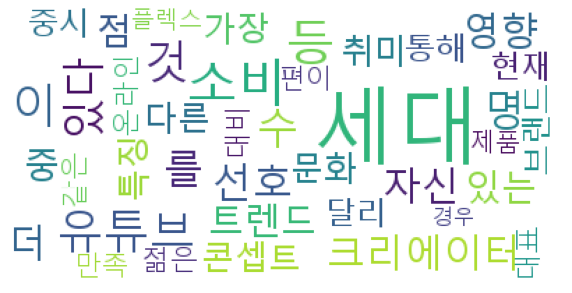

In [1]:
from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
import platform

# open으로 txt파일을 열고 read()를 이용하여 읽는다.
text = open('./4일차 수업소스/test.txt',encoding='utf-8').read()


okt = Okt()

# okt함수를 통해 읽어들인 내용의 형태소를 분석한다.
sentences_tag = []
sentences_tag = okt.pos(text)

noun_adj_list = []


# tag가 명사이거나 형용사인 단어들만 noun_adj_list에 넣어준다.
for word, tag in sentences_tag:
    if tag in ['Noun' , 'Adjective']:
        noun_adj_list.append(word)


# 가장 많이 나온 단어부터 40개를 저장한다.
counts = Counter(noun_adj_list)
tags = counts.most_common(40)
print(tags)

# WordCloud를 생성한다.

# 한글을 분석하기위해 font를 한글로 지정해주어야 된다. macOS는 .otf , window는 .ttf 파일의 위치를 지정해준다. (ex. '/Font/GodoM.otf')
if platform.system() == 'Windows':
    path = r'c:\Windows\Fonts\malgun.ttf'
elif platform.system() == 'Darwin': # Mac OS
    path = r'/System/Library/Fonts/AppleGothic'
else:
    path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

wc = WordCloud(font_path=path, background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tags))

# 생성된 WordCloud를 test.jpg로 보낸다.
#cloud.to_file('test.jpg')


plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()
